In [175]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import math 
import pandas as pd
from collections import Counter 
import csv
from io import StringIO  
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model 
# import statsmodels.api as sm 
import statistics 
from collections import OrderedDict 
from sklearn.tree import export_graphviz 

iris = datasets.load_iris()
iris_data = iris.data

In [12]:
df = pd.read_csv('iris.csv')
Sepal_lengh = df[df.columns[0]]
Sepal_width = df[df.columns[1]]
Petal_length = df[df.columns[2]]
Petal_width= df[df.columns[3]]
Species= df[df.columns[4]]
print(Species[148])
#Species_dic = { 'Species': Species[i] for i in range(0, len(Species))}
for i in range(0, len(Species)):
    Species_dic = {'Species': Species[i] }
print(Species_dic)    
               

2.0
{'Species': nan}


In [158]:
list = []
with open('iris.csv', 'r') as df:
    for line in csv.DictReader(df):
        list.append(line)
print(list)     

[{'Sepal lengh': '5.1', 'Sepal width': '3.5', 'Petal length': '1.4', 'Petal width': '0.2', 'Species': '0'}, {'Sepal lengh': '4.9', 'Sepal width': '3', 'Petal length': '1.4', 'Petal width': '0.2', 'Species': '0'}, {'Sepal lengh': '4.7', 'Sepal width': '3.2', 'Petal length': '1.3', 'Petal width': '0.2', 'Species': '0'}, {'Sepal lengh': '4.6', 'Sepal width': '3.1', 'Petal length': '1.5', 'Petal width': '0.2', 'Species': '0'}, {'Sepal lengh': '5', 'Sepal width': '3.6', 'Petal length': '1.4', 'Petal width': '0.2', 'Species': '0'}, {'Sepal lengh': '5.4', 'Sepal width': '3.9', 'Petal length': '1.7', 'Petal width': '0.4', 'Species': '0'}, {'Sepal lengh': '4.6', 'Sepal width': '3.4', 'Petal length': '1.4', 'Petal width': '0.3', 'Species': '0'}, {'Sepal lengh': '5', 'Sepal width': '3.4', 'Petal length': '1.5', 'Petal width': '0.2', 'Species': '0'}, {'Sepal lengh': '4.4', 'Sepal width': '2.9', 'Petal length': '1.4', 'Petal width': '0.2', 'Species': '0'}, {'Sepal lengh': '4.9', 'Sepal width': '3.1

In [14]:
class Node:

    def __init__(self, label):
        self.attribute = None  # Attribute (e.g. 'Outlook')
        self.attribute_values = []  # Values (e.g. 'Sunny')
        self.label = label  # Class label for the node (e.g. 'Play')
        self.children = {}  # Keeps track of the node's children

        # References to the parent node
        self.parent_attribute = None
        self.parent_attribute_value = None

        # Used for pruned trees
        self.pruned = False  # Is this tree pruned?
        self.instances_labeled = []

In [189]:
def mostCommonClass(dataset):    
    classes = []    
    for data in dataset:       
        classes.append(data['Species'])        
    return Counter(classes).most_common(1)[0][0]   

def most_informative_attribute(dicts):
    selected_attribute = None
    max_gain_ratio = -1000
    
    attributes = [key for key,value in dicts[0].items()]
    attributes.remove('Species')
    
    for attribute in attributes:
        gain = gain_ratio(dicts,attribute)
        
        if gain > max_gain_ratio:
            max_gain_ratio = gain
            selected_attribute = attribute
    return selected_attribute          
        
    
def ID3(dicts,default):    
   
    if len(dicts) == 0:
        return Node(deafult)
    
    classes = []

    for dt in dicts:        
        classes.append(dt['Species'])
        
    if len(Counter(classes)) ==1 or len(classes)==1:
        tree = Node(mostCommonClass(dicts))
        return tree;
    else:
        best_attribute = most_informative_attribute(dicts)      
        tree = Node(mostCommonClass(dicts))
        tree.attribute = best_attribute
        best_attribute_values = []
        
        for dt in dicts:
            best_attribute_values.append(dt[best_attribute])
        
        settemp = set(best_attribute_values)   
        tree.attribute_values = (settemp)           
        for best_attr in tree.attribute_values:
            dict_i = []
            for dt in dicts:
                if dt[best_attribute] == best_attr:
                    dict_i.append(dt)                 
            subtree = ID3(dict_i,mostCommonClass(dicts))
            subtree.instances_labeled = dict_i
            
            subtree.parent_attribute = best_attribute
            subtree.parent_attribute_value = best_attr
            
            tree.children[best_attr] = subtree
    return tree        
            
    
    
def combineXY(data, target):
    return np.concatenate((data, np.array([target]).T), axis=1)

def divide_dataset_by_class(dataset):
    label_column = dataset[:, -1]
    labels, counts = np.unique(label_column, return_counts=True)
    classes = []
    classlist = {}
       
    for cls in range(len(counts)):
        classes = []
        for index in range(len(label_column)):
            if dataset[0:,4][index] == cls:
                classes.append(dataset[index, :])
        classlist[cls] = classes        
    return classlist             
 
# Entropy of particulare class    
def entropy(dicts, attribute, attribute_value):
    
    classes =[]
    
    for dt in dicts:
        if dt[attribute] == attribute_value:
            classes.append(dt['Species'])
    
    counter = Counter(classes)
    
    if len(counter)==1:
        return 0
    else:
        entropy = 0
        for c, count_of_c in counter.items():
            #print(c , '->' ,count_of_c )
            probability = count_of_c / len(classes)
            entropy += probability * math.log2(probability)
    return -entropy 

# Entropy of whole class 
def prior_entropy(dicts):
    
    classes = []    
    for dt in dicts:       
        classes.append(dt['Species'])    
    counter = Counter(classes)
    
    if len(counter) ==1:
        return 0
    else:
        entropy = 0
        for c, count_of_c in counter.items():
            #print(c , '->' ,count_of_c )
            probability = count_of_c / len(classes)
            entropy += probability * math.log2(probability)
    return -entropy 

def gain_ratio(dicts,attribute):  
    priorentropy = prior_entropy(dicts)
    
    values = []
    for dt in dicts:
        values.append(dt[attribute])  
     
        
    counter = Counter(values)
    
    remaining_entropy = 0
    split_information = 0
    
    for attribute_value, attribute_value_count in counter.items():
        #print(attribute_value ,'->' ,attribute_value_count)
        probability = attribute_value_count /len(counter)
        remaining_entropy += (probability*entropy(dicts,attribute,attribute_value))
        split_information += probability * math.log2(probability)
    
    information_gain = priorentropy - remaining_entropy
    split_information = - split_information
    
    gainratio = 0
    if split_information !=0:
        gainratio = information_gain / split_information
    else:
        gainratio = -1000
    
    return gainratio   

def predict(node, test_instance):
    if len(node.children) == 0:
        return node.label
    else:
        attribute_value = test_instance[node.attribute]
                
        if attribute_value in node.children and node.children[attribute_value].pruned == False:
            return predict(node.children[attribute_value],test_instance)
        else:
            instances = []           
            for attr_value in node.attribute_values:               
                instances += node.children[attr_value].instances_labeled           
            return mostCommonClass(instances)    
       
    
def accuracy(trained_tree, test_instances):
    no_of_correct_predictions = 0
    
    for test_instance in test_instances:
        if predict(trained_tree, test_instance) == test_instance['Species']:
            no_of_correct_predictions += 1
    
    return no_of_correct_predictions / len(test_instances)  


def accuracy1(trained_tree, test_instances):
    no_of_correct_predictions = 0
    y_actual = []
    y_predicted = []
    
    confusion_matrix = [[0 for i in range(3)] for j in range(3)]
    
    for test_instance in test_instances:
        y_predicted.append(predict(trained_tree, test_instance)) 
        y_actual.append(test_instance['Species'])
        
    y_predicted = [int(numeric_string) for numeric_string in y_predicted]
    y_actual = [int(numeric_string) for numeric_string in y_actual]
    
    #print('Actual Values:',y_actual)
    #print('Predicted Values:',y_predicted)
    
    for i in range(len(y_predicted)):
          confusion_matrix[y_predicted[i]][y_actual[i]] += 1         
                  
    confusion_matrix = np.array(confusion_matrix)
    print('Confusion Matrix:')
    print(confusion_matrix)
    
    balane_accuracy = 0
    true_positive = 0
    false_positive = 0
    false_negative = 0
    true_negative = 0
    total = confusion_matrix.sum()
    balance_accuracy_total = 0
    roc_list = []
    false_positive_rate_list = []
    true_positive_rate_list = []
    F_list = []

    # Calculating balance accuracy 
    for i in range(3):
        # True Positive = 1st number in confusion matrix at diagonal  
        true_positive = confusion_matrix[i][i]
        # False Positive = addition of all numbers in row except true positive number
        false_positive = sum(confusion_matrix[:,i]) - true_positive
        # False Negative = addition of all numbers in respetive column except true positive 
        false_negative = sum(confusion_matrix[i,:]) - true_positive
        # True Negative = addition of all matrix except false positive , false negative and true positive 
        true_negative = total - (false_positive + false_negative + true_positive)         
        sensitivity = true_positive / (true_positive+false_negative)
        specificity =  true_negative/(false_positive+true_negative)
        precision = true_positive / (true_positive+false_positive)
        balane_accuracy = (sensitivity + specificity)/2
        F1_score = 2*((precision*sensitivity)/(precision+sensitivity))
        false_positive_rate = false_positive / (true_negative+false_positive)
        false_positive_rate_list.append(false_positive_rate)
        true_positive_rate = true_positive / (true_positive+false_negative)
        true_positive_rate_list.append(true_positive_rate)
        roc = false_positive_rate/true_positive_rate
        print('Class',i)
        print('True Positive:',true_positive)
        print('False Positive:',false_positive)
        print('False Negative:',false_negative)
        print('True Negative:',true_negative)
        print('Recall:', sensitivity)
        print('Precision:',precision)
        print('Balance Accuracy:',balane_accuracy)    
        print('F1 Score:',F1_score)
        print('False Positive Rate:',false_positive_rate)
        print('True Positive Rate:',true_positive_rate)
        print('ROC:',roc)
        roc_list.append(roc)
        F_list.append(F1_score)
        
        
    plt.figure(figsize=(15, 4))
    plt.title('ROC Curve', fontdict={'fontweight': 'bold', 'fontsize': 18})
    plt.plot(false_positive_rate_list,true_positive_rate_list, label='ROC Curve')
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.savefig('roc', dpi=100)
    plt.show() 
    
       
   

Tree Attribute: Petal length
Tree Attribute Values: {'6.3', '', '5.5', '1.6', '5', '6.6', '1.7', '1.5', '3.8', '4.2', '3.7', '6', '1.9', '5.6', '5.9', '1', '4.7', '6.1', '1.1', '3.9', '3.3', '5.7', '5.4', '1.4', '5.1', '4', '4.5', '5.8', '6.9', '6.7', '4.4', '4.1', '4.6', '1.3', '5.3', '4.8', '3.5', '4.9', '3.6', '5.2', '4.3'}
Tree Lable: 2


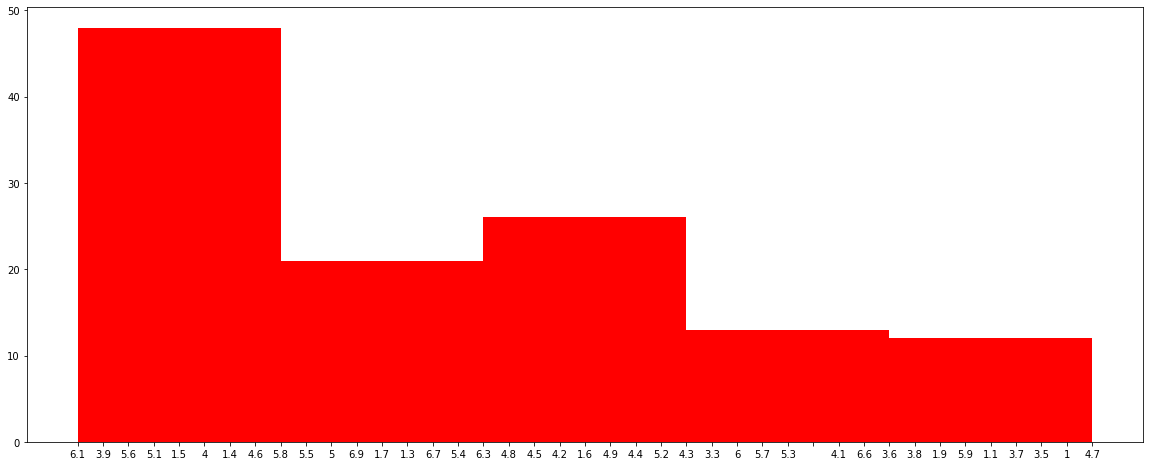

6
[ 0.  8. 16. 24. 32. 40.]
5
[48. 21. 26. 13. 12.]


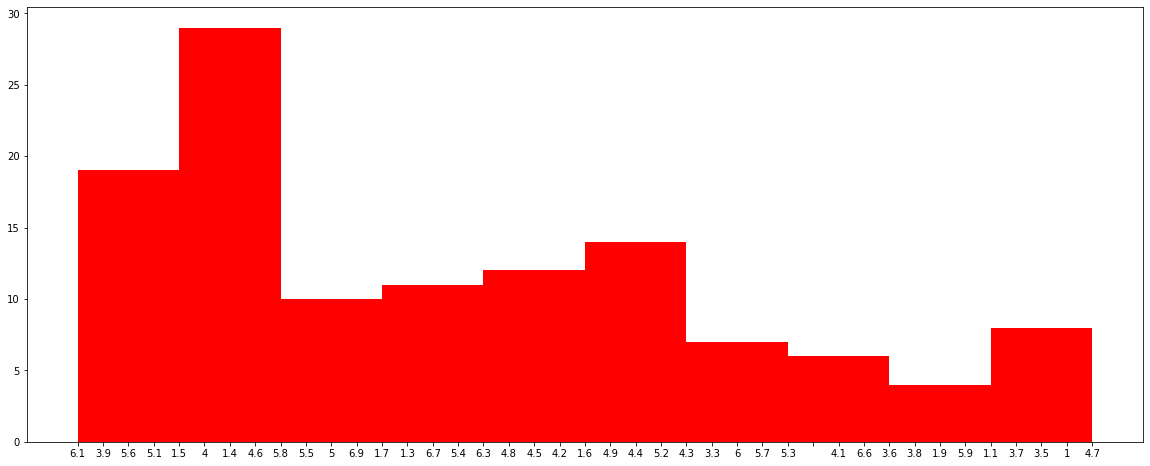

11
[ 0.  4.  8. 12. 16. 20. 24. 28. 32. 36. 40.]
10
[19. 29. 10. 11. 12. 14.  7.  6.  4.  8.]


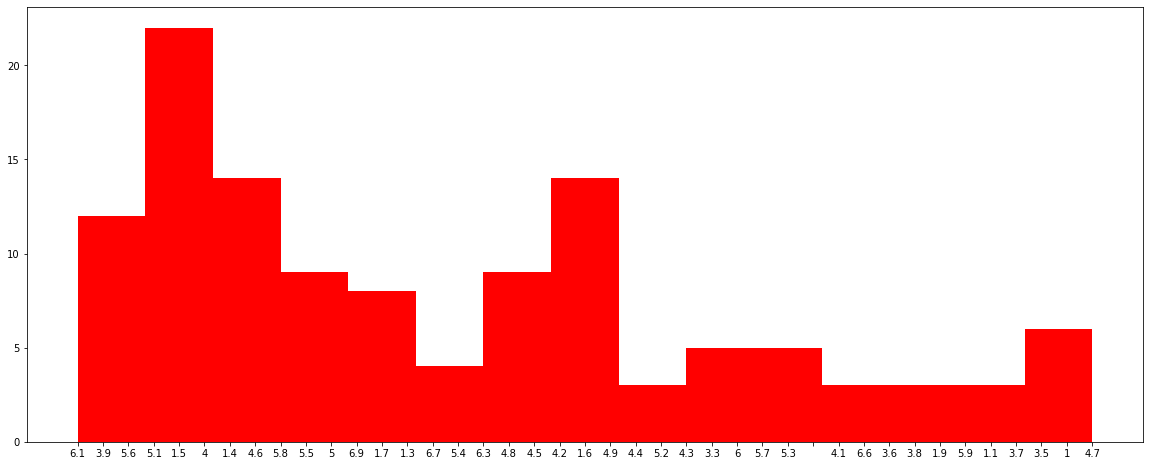

16
[ 0.          2.66666667  5.33333333  8.         10.66666667 13.33333333
 16.         18.66666667 21.33333333 24.         26.66666667 29.33333333
 32.         34.66666667 37.33333333 40.        ]
15
[12. 22. 14.  9.  8.  4.  9. 14.  3.  5.  5.  3.  3.  3.  6.]


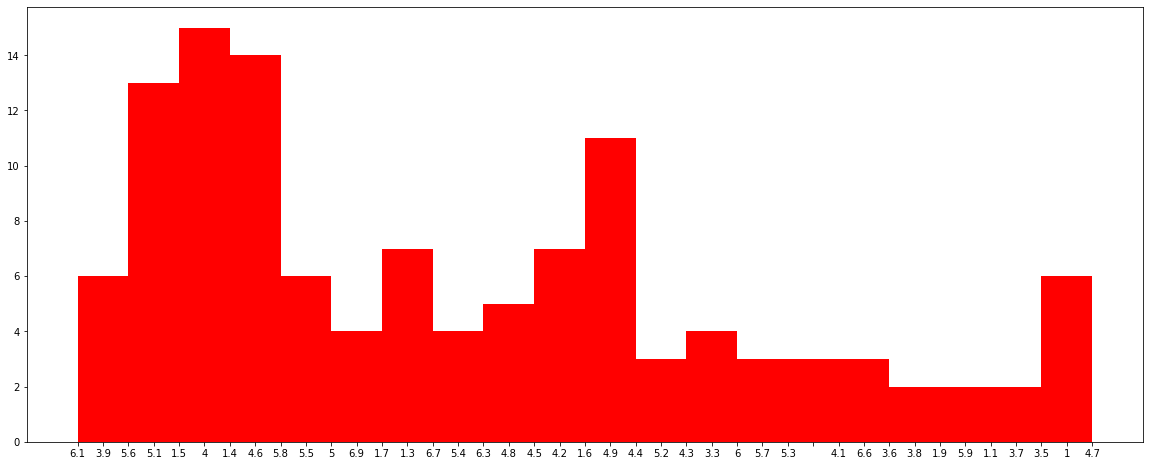

21
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40.]
20
[ 6. 13. 15. 14.  6.  4.  7.  4.  5.  7. 11.  3.  4.  3.  3.  3.  2.  2.
  2.  6.]
Confusion Matrix:
[[ 9  0  0]
 [ 0 11  1]
 [ 2  2  6]]
Class 0
True Positive: 9
False Positive: 2
False Negative: 0
True Negative: 20
Recall: 1.0
Precision: 0.8181818181818182
Balance Accuracy: 0.9545454545454546
F1 Score: 0.9
False Positive Rate: 0.09090909090909091
True Positive Rate: 1.0
ROC: 0.09090909090909091
Class 1
True Positive: 11
False Positive: 2
False Negative: 1
True Negative: 17
Recall: 0.9166666666666666
Precision: 0.8461538461538461
Balance Accuracy: 0.9057017543859649
F1 Score: 0.8799999999999999
False Positive Rate: 0.10526315789473684
True Positive Rate: 0.9166666666666666
ROC: 0.11483253588516747
Class 2
True Positive: 6
False Positive: 1
False Negative: 4
True Negative: 20
Recall: 0.6
Precision: 0.8571428571428571
Balance Accuracy: 0.7761904761904761
F1 Score: 0.7058823529411764
False Positi

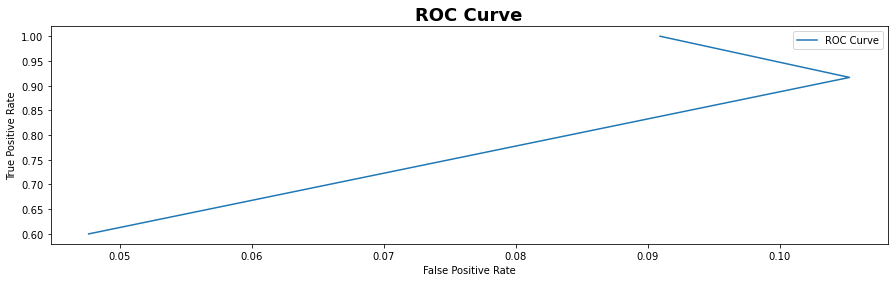

Accuracy: 0.8387096774193549


In [191]:
from sklearn.model_selection import train_test_split   

training_set, testing_set = train_test_split(list, test_size=0.2, random_state=1)

default  = mostCommonClass(training_set)
tree = ID3(training_set,default)
print('Tree Attribute:',tree.attribute)
print('Tree Attribute Values:',tree.attribute_values)
print('Tree Lable:',tree.label)

#feature columns
feature_cols = ['sepal length (cm)', 'sepal width (cm)', 'sepal width (cm)', 'petal width (cm)']#,'Categories']
    
barchart = [training_set[i][tree.attribute] for i in range(len(training_set))]
for i in range(5,25,5):    
    (n1, x1, patches1) = plt.hist(barchart, bins=i,color='red')
    plt.show()
    print(len(x1))
    print(x1)
    print(len(n1))
    print(n1)

accuracy1(tree,testing_set)
acc = accuracy(tree,testing_set)
print('Accuracy:',acc)